# Easy for me, Hard for you

In [2]:
from prettytable import PrettyTable as PT

对于人类来说，进行大量的数字运算是很困难的，但是对于电脑来说很简单；与之相对，对于电脑来说，快速精确得识别图片很困难，但是对于人类来说，这是一个很简单的任务。

In [7]:
#利用PrettyTable，定义表格的表头
u = PT(["Problem","Computer","Human"])

# 调用add_row()方法，向表格中添加两条数据
u.add_row(["Multiply thousands of large numbers quickly","Easy","Hard"])
u.add_row(["Find faces in a photo of a crowd of people","Hard","Easy"])

# 使用aligh属性，设置Problem靠右
u.align["Problem"] = "r"

print(u)

+---------------------------------------------+----------+-------+
|                                     Problem | Computer | Human |
+---------------------------------------------+----------+-------+
| Multiply thousands of large numbers quickly |   Easy   |  Hard |
|  Find faces in a photo of a crowd of people |   Hard   |  Easy |
+---------------------------------------------+----------+-------+


Neural Network 的目的：使得人工智能通过算法快速解决困难的问题。

# A Simple Prediction Machine

简单机器的工作流程

In [9]:
#简单机器的工作流程：
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

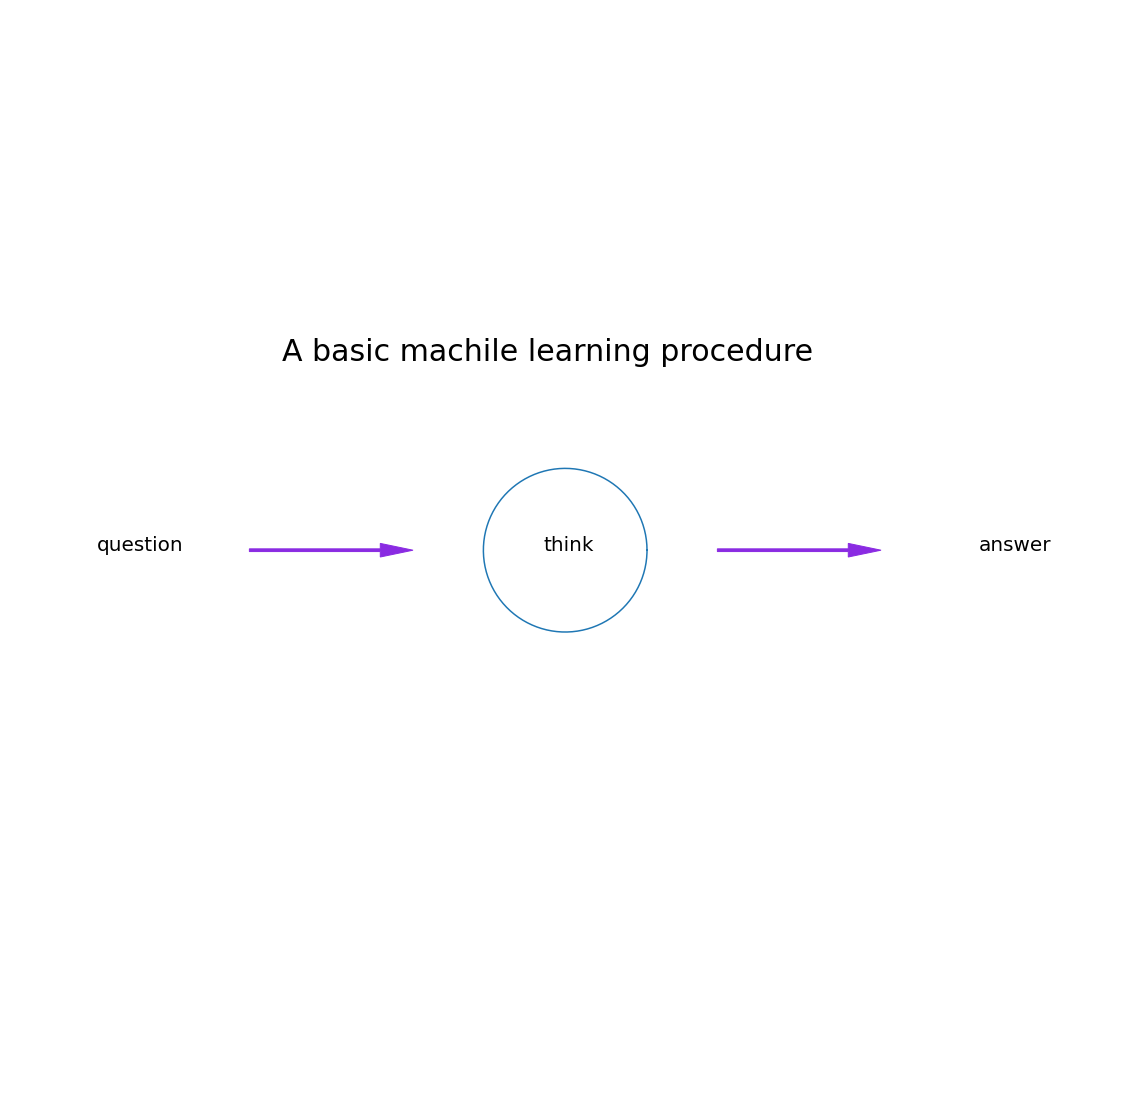

In [133]:
# draw the flow chart

fig, ax = plt.subplots(1,5,figsize = (20, 20))
an = np.linspace(0, 2 * np.pi, 200)

# 1. add text "question"
ax[0].text(0.5, 0.5, "question",size = 20)

# 2. add the arrow
ax[1].arrow(0,2,5,0,width=0.01,
             length_includes_head=True, 
              head_width=0.05,
              head_length=1,
             fc='#8A2BE2',
             ec='#8A2BE2')
ax[1].set_ylim(0, 4)


# 3. add the circle
ax[2].plot(30 * np.cos(an), 30 * np.sin(an))
ax[2].axis('equal')
# add the text "think" inside the circle
ax[2].text(-8, 0.0, "think",size = 20)


# 4. add the arrow

ax[3].arrow(0,2,5,0,width=0.01,
             length_includes_head=True, # 增加的长度包含箭头部分
              head_width=0.05,
              head_length=1,
             fc='#8A2BE2',
             ec='#8A2BE2')
ax[3].set_ylim(0, 4)

# 5. add the text "answer"
ax[4].text(0.2, 0.5, "answer",size = 20)


# make the axis invisible
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")
ax[4].axis("off")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("A basic machile learning procedure", x=0.5,y=0.65, fontsize=30)
plt.show()

计算机并不会真正思考，而是美化计算机记忆，我们可以用另一张图来准确描述这个过程。

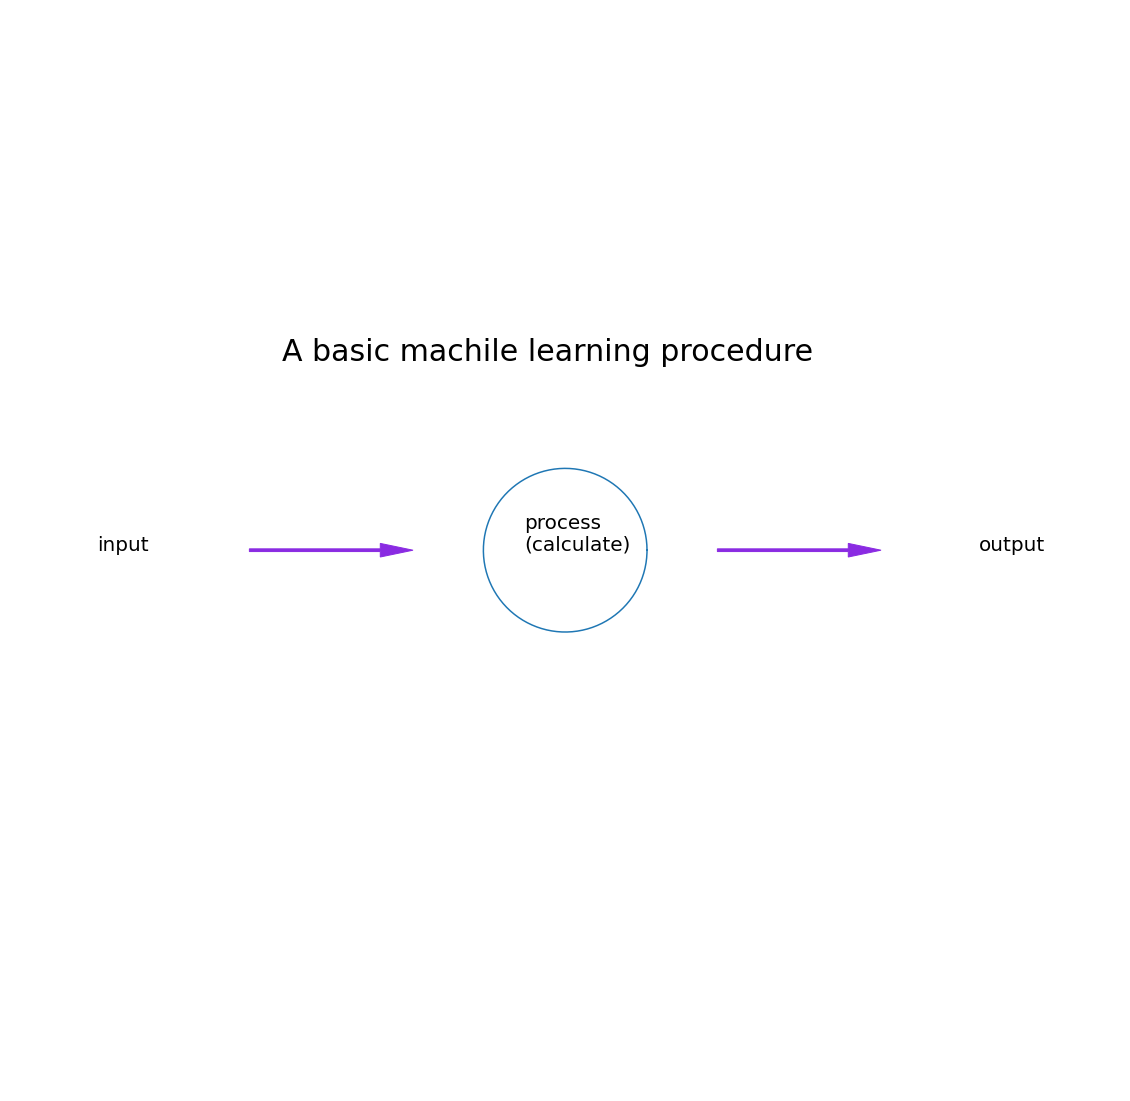

In [138]:
# draw the flow chart

fig, ax = plt.subplots(1,5,figsize = (20, 20))
an = np.linspace(0, 2 * np.pi, 200)

# 1. add text "question"
ax[0].text(0.5, 0.5, "input",size = 20)

# 2. add the arrow
ax[1].arrow(0,2,5,0,width=0.01,
             length_includes_head=True, 
              head_width=0.05,
              head_length=1,
             fc='#8A2BE2',
             ec='#8A2BE2')
ax[1].set_ylim(0, 4)


# 3. add the circle
ax[2].plot(30 * np.cos(an), 30 * np.sin(an))
ax[2].axis('equal')
# add the text "think" inside the circle
ax[2].text(-15, 0.0, "process"+"\n"+"(calculate)",size = 20)


# 4. add the arrow

ax[3].arrow(0,2,5,0,width=0.01,
             length_includes_head=True, # 增加的长度包含箭头部分
              head_width=0.05,
              head_length=1,
             fc='#8A2BE2',
             ec='#8A2BE2')
ax[3].set_ylim(0, 4)

# 5. add the text "answer"
ax[4].text(0.2, 0.5, "output",size = 20)


# make the axis invisible
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")
ax[4].axis("off")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("A basic machile learning procedure", x=0.5,y=0.65, fontsize=30)
plt.show()

例如我们的输入是千米：kilometers,输出是里：miles。 那我们需要通过输入计算出输出。我们可以知道他们的关系是线性的，即：
$$
miles = kilometers \times c
$$
现在我们有很多对正确的Kilometers和miles,我们要怎么求出这个常数$ c $呢？


1.我们有一对真实数值：kilometers = 100, miles = 62.137。

2.首先我们选取一个随机值：$ c = 0.5 $，我们可以得到当kilometers为100时，miles为50。

3.与真实值对比，我们得到一个 
$$
error = truth - calculated
      = 62.137 - 50
      = 12.137
$$  

4.利用error得到一个更好的估计值c。通过上一步，我们知道增大c可以增大output（miles)。将c上调为0.6

5.得到 
$$ miles = kilometers \times c = 60
error = truth - calculated
      = 62.137 - 60
      = 2.137
$$

6.不断修改c的估计值直到达到stopping criteria.



#### 修改参数c的注意事项
更大的error往往代表修正$ \Delta c$更大，更小的error往往代表需要的修正$ \Delta c$更小。

# Classifying is Not very Differenct from Predicting

我们将前面这个步骤定义为 Predictor, 因为它使用input来预测output。
We refined that prediction by adjusting an internal parameter, informed by the error we saw when comparing with a known-true example.

In [166]:
import random
x1 = [random.gauss(3,1) for x in range(0,7)]
y1 = [random.gauss(6,1) for x in range(0,7)]
x2 = [random.gauss(7,1) for x in range(0,7)]
y2 = [random.gauss(3,1) for x in range(0,7)]

Text(0, 0.5, 'length')

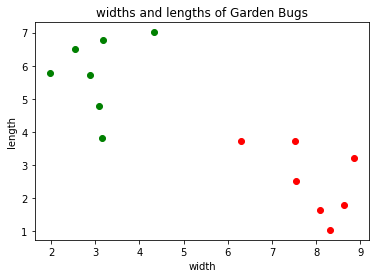

In [170]:
plt.scatter(x1,y1,c = "g")
plt.scatter(x2,y2,c = "r")
plt.title("widths and lengths of Garden Bugs")
plt.xlabel("width")
plt.ylabel("length")

这里我们假设有两组小虫子，以正态分布随机生成width和length。就如同上述的predictor，我们可以通过划线将这两种虫子分为两组。

Text(3, 4, 'separating line')

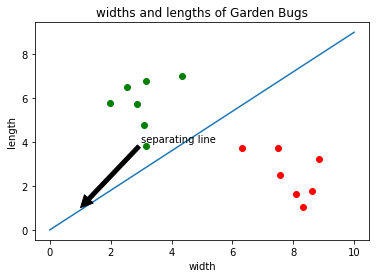

In [179]:
plt.scatter(x1,y1,c = "g")
plt.scatter(x2,y2,c = "r")
plt.title("widths and lengths of Garden Bugs")
plt.xlabel("width")
plt.ylabel("length")
x = np.linspace(0, 10, 200)
plt.plot(x,0.9*x)
plt.annotate('separating line', xy=(1, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.005))

当出现一个新的小虫子时，我们可以通过separating line对它归类。

Text(3, 4, 'unkown bug')

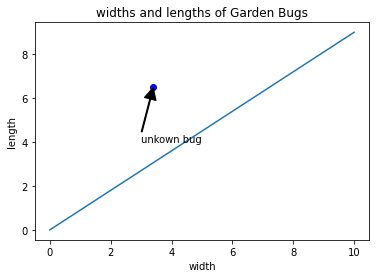

In [186]:
plt.scatter(3.4,6.5,c = "b")
plt.title("widths and lengths of Garden Bugs")
plt.xlabel("width")
plt.ylabel("length")
x = np.linspace(0, 10, 200)
plt.plot(x,0.9*x)
plt.annotate('unkown bug', xy=(3.4,6.5), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.005,width = 1))

对于简单的分类问题来说，我们需要找到这跟分类线————这和预测问题并没有什么太大的区别。